<a href="https://colab.research.google.com/github/kuolunwang/Image-Processing/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# library
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from google.colab.patches import cv2_imshow
%matplotlib inline

In [ ]:
# load picture from google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loaded the image in grayscale
image = cv2.imread('/content/drive/MyDrive/Bird 3 blurred.tif')

In [ ]:
# show origin image
cv2_imshow(image)

In [ ]:
# get rgb channel
B = image[:,:,0]
G = image[:,:,1]
R = image[:,:,2]

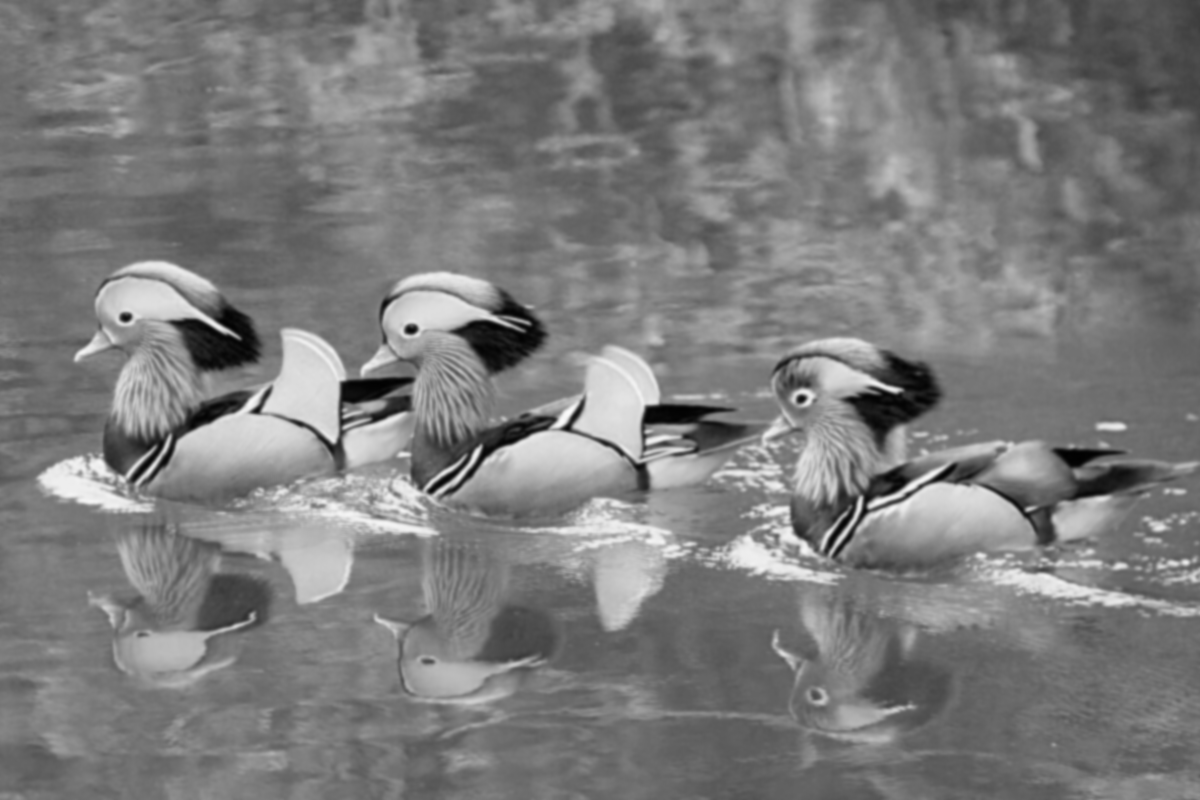

In [ ]:
# show R channel
cv2_imshow(R)

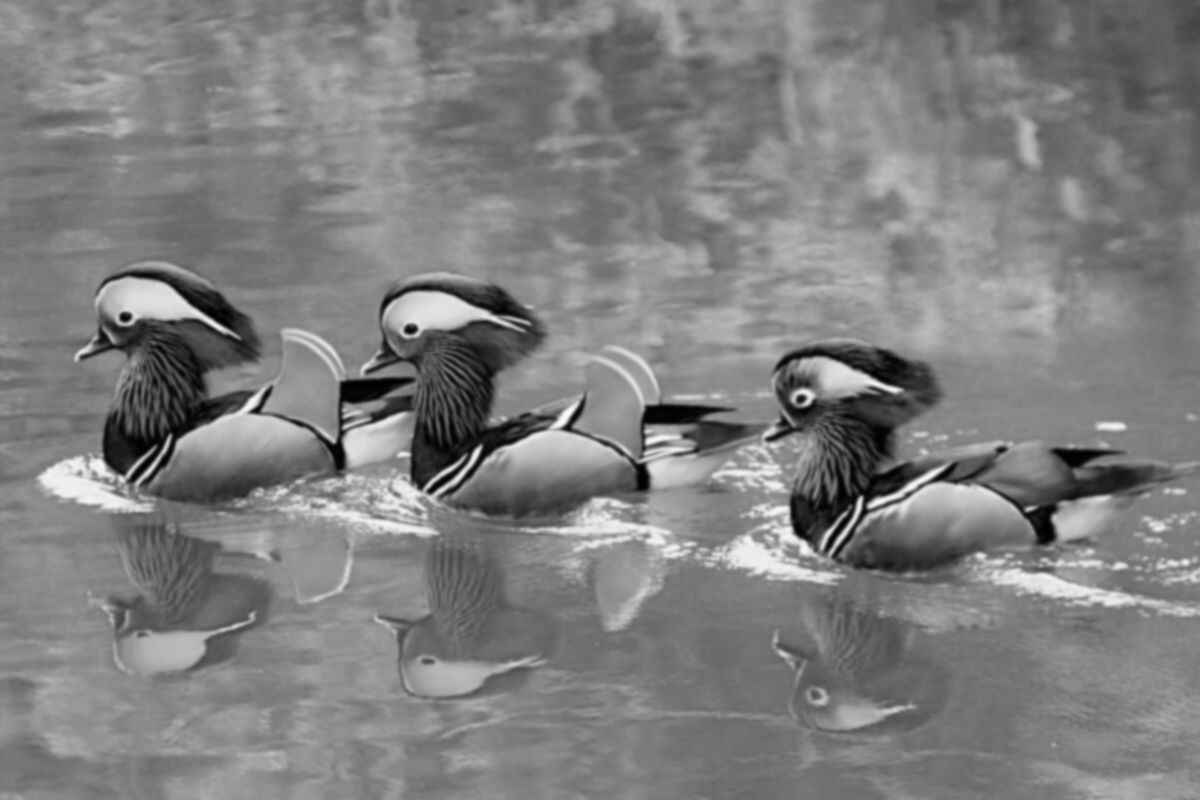

In [ ]:
# show G channel
cv2_imshow(G)

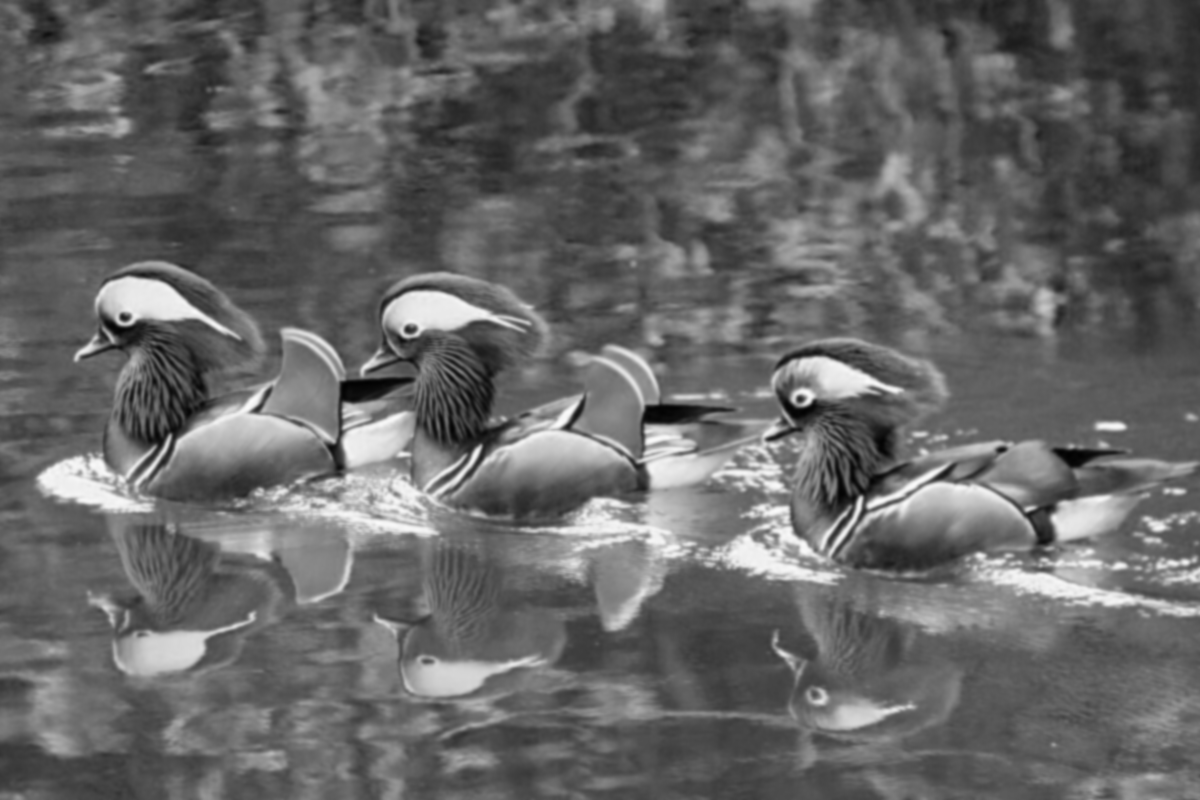

In [ ]:
# show B channel
cv2_imshow(B)

In [ ]:
# rgb to hsi 
def rgb2hsi(img):
  row, col = img.shape[:2]
  H = np.zeros((row,col))
  S = np.zeros((row,col))

  B,G,R = cv2.split(img)
  B,G,R = B / 255.0 , G / 255.0, R / 255.0

  I = (R+G+B)/3.0

  for i in range(row):
    for j in range(col):
      min_value = np.min([R[i][j],B[i][j],G[i][j]])
      sum = R[i][j]+G[i][j]+B[i][j]
      
      if sum == 0:
        S[i][j] = 0
      else:
        S[i][j] = 1 - (3* min_value / sum) 

      den = ((R[i][j]-G[i][j])**2+(R[i][j]-B[i][j])*(G[i][j]-B[i][j]))**0.5
      if den == 0:
        thetha = 1
      else:
        thetha = (0.5 * (2*R[i][j]-G[i][j]-B[i][j])) / den
      thetha = np.clip(thetha,-1,1)
      thetha = np.arccos(thetha) / (2*math.pi) 

      if B[i][j] <= G[i][j]:
        H[i][j] = thetha
      else:
        H[i][j] = 1 - thetha

  return H,S,I

In [ ]:
# convert rgb to hsi
H,S,I = rgb2hsi(image)

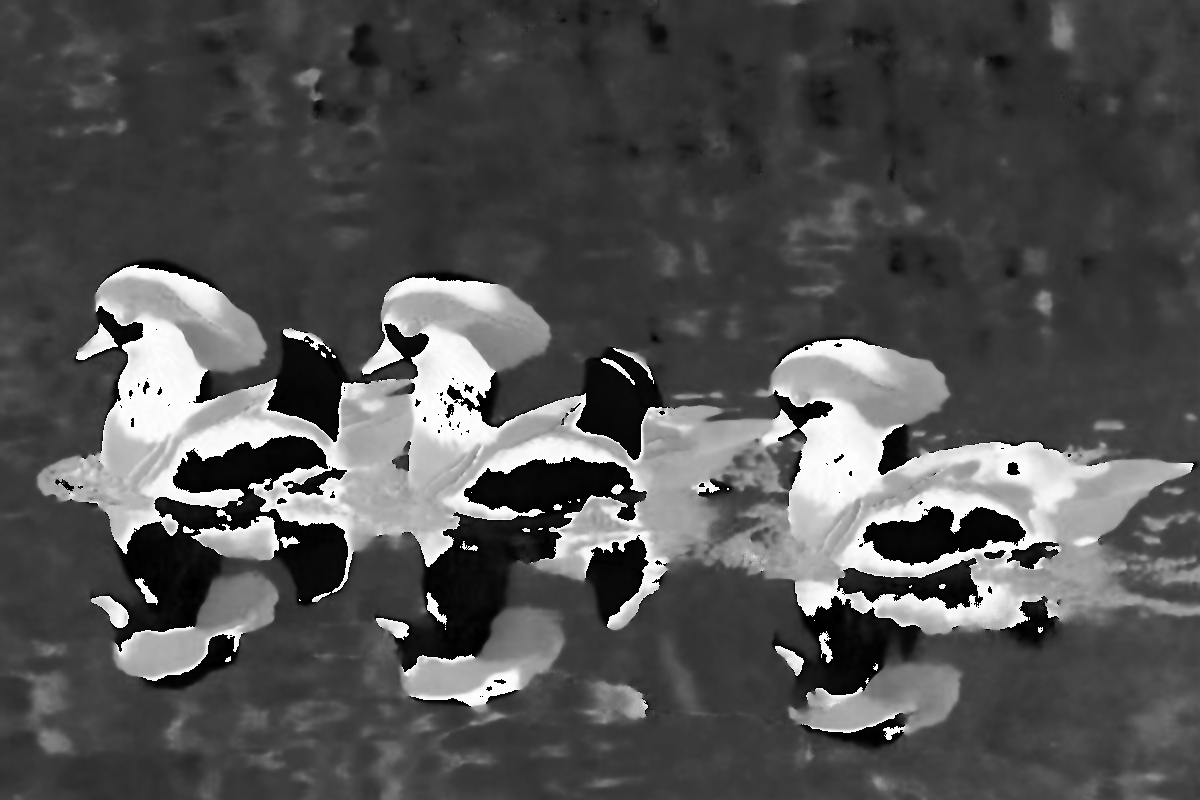

In [ ]:
# show H channel
cv2_imshow(H * 255)

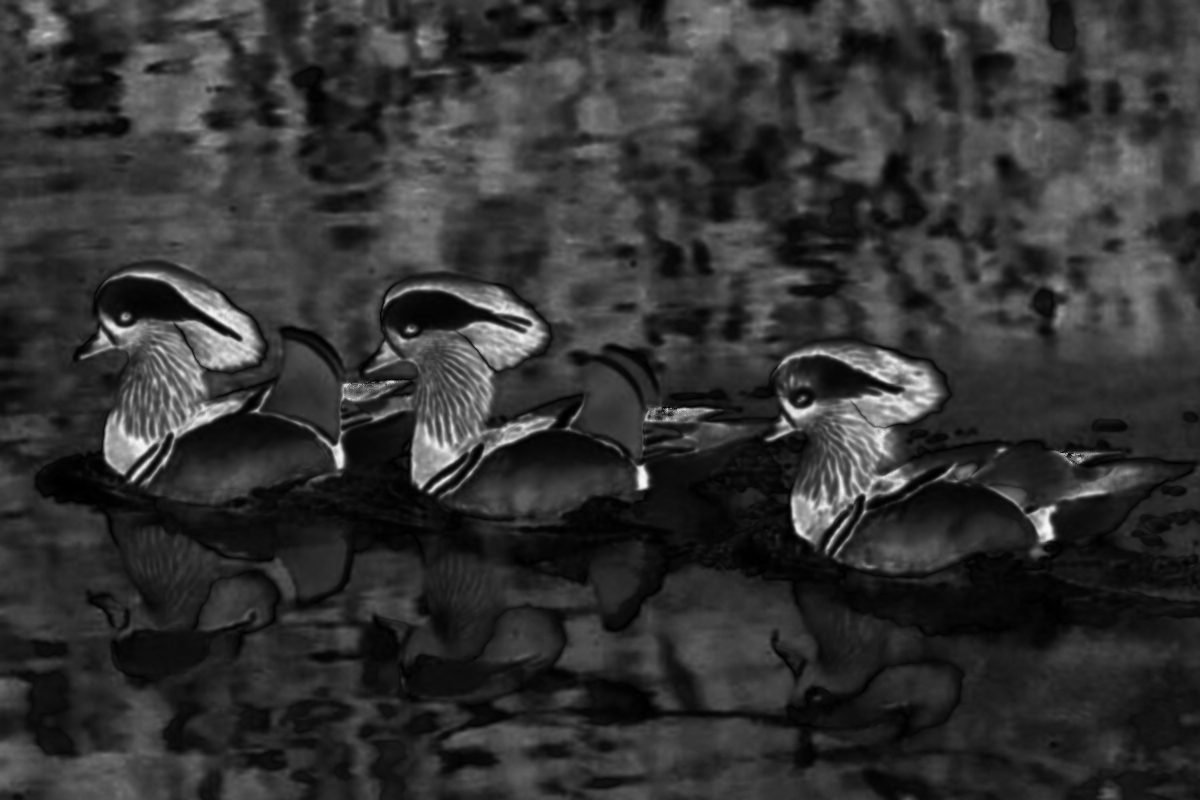

In [ ]:
# show S channel
cv2_imshow(S * 255)

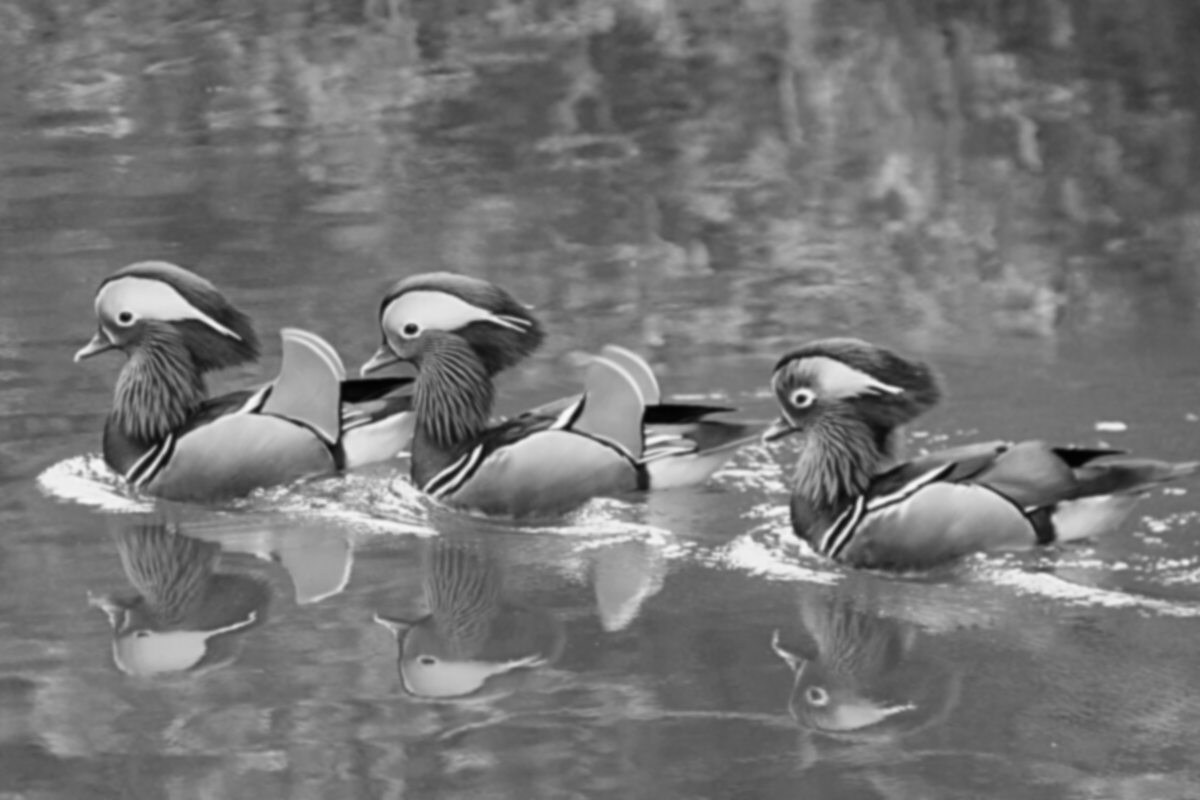

In [ ]:
# show I channel
cv2_imshow(I * 255)

In [ ]:
# hsi to rgb
def hsi2rgb(H,S,I):
  row, col = H.shape
  R = np.zeros((row,col))
  G = np.zeros((row,col))
  B = np.zeros((row,col))

  H = H * np.pi * 2
  rad_60 = 60 / 180 * np.pi
  for i in range(row):
    for j in range(col):

      if(H[i][j] < 2 * np.pi / 3):
        B[i][j] = I[i][j] * (1 - S[i][j])
        R[i][j] = I[i][j] * (1+ (S[i][j]*np.cos(H[i][j])/np.cos(rad_60-H[i][j])))
        G[i][j] = 3 * I[i][j] - (R[i][j] + B[i][j])
      elif(H[i][j] < 4 * np.pi / 3):
        H_GB = H[i][j] - 2 * rad_60
        R[i][j] = I[i][j] * (1 - S[i][j])
        G[i][j] = I[i][j] * (1+ (S[i][j]*np.cos(H_GB)/np.cos(rad_60-H_GB)))
        B[i][j] = 3 * I[i][j] - (R[i][j] + G[i][j])
      else:
        H_RB = H[i][j] - 4 * rad_60
        G[i][j] = I[i][j] * (1 - S[i][j])
        B[i][j] = I[i][j] * (1+ (S[i][j]*np.cos(H_RB)/np.cos(rad_60-H_RB)))       
        R[i][j] = 3 * I[i][j] - (B[i][j] + G[i][j])
        
  return R,G,B

In [ ]:
# laplacian kernel
laplacian_kernel = np.zeros((3,3))
laplacian_kernel[0] = [-1,-1,-1]
laplacian_kernel[1] = [-1,9,-1]
laplacian_kernel[2] = [-1,-1,-1]

In [ ]:
# sharp rgb image
sharp_rgb = cv2.filter2D(image,-1,laplacian_kernel)

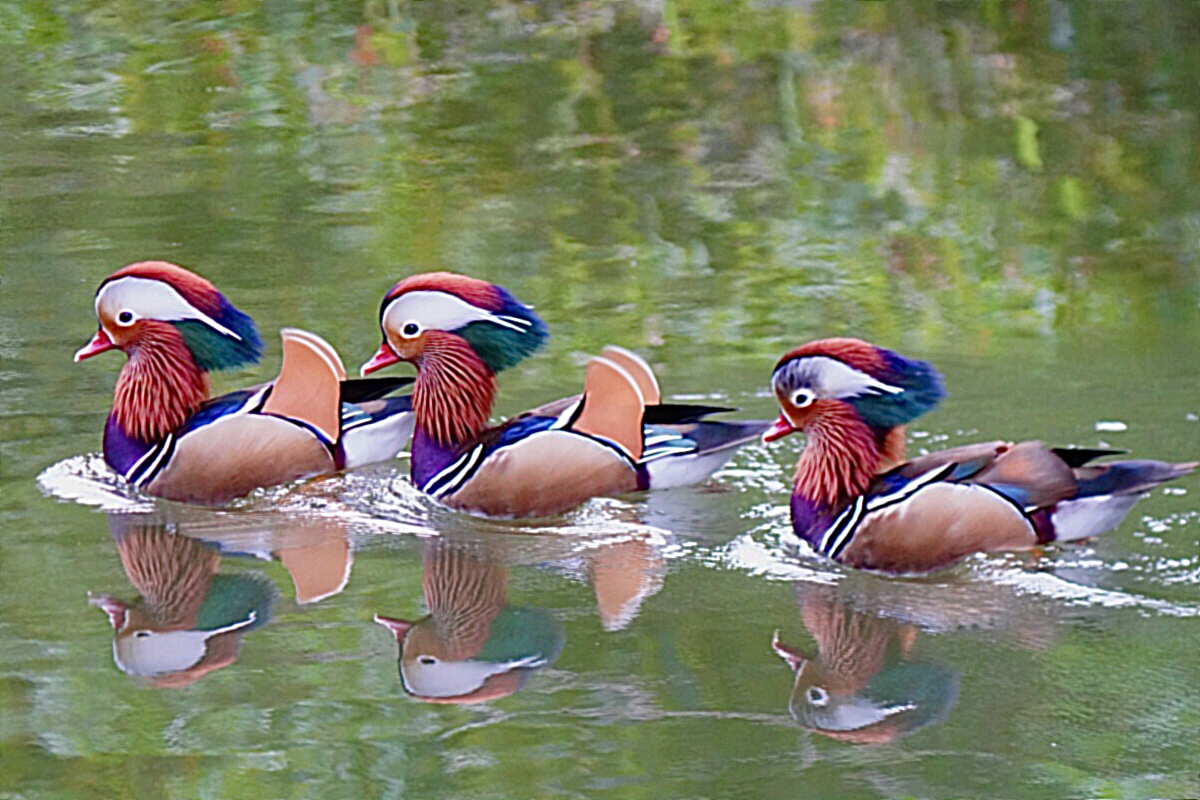

In [ ]:
# show sharpened rgb image
cv2_imshow(sharp_rgb)

In [ ]:
# sharp hsi image
sharp_i = cv2.filter2D(I,-1,laplacian_kernel)

In [ ]:
# convert sharpened hsi to rgb 
r,g,b = hsi2rgb(H,S,sharp_i)

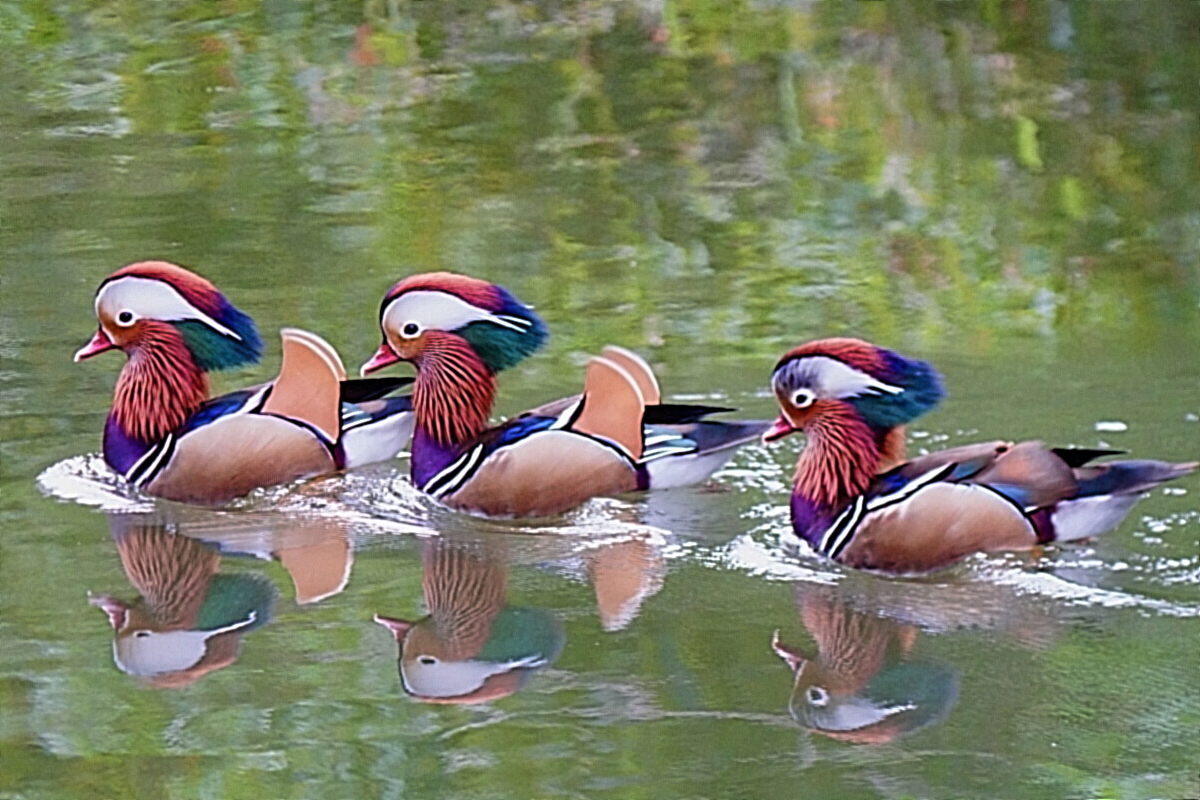

In [ ]:
# show sharpened hsi-based image
sharp_hsi = np.stack((b*255,g*255,r*255),axis=2)
cv2_imshow(sharp_hsi)

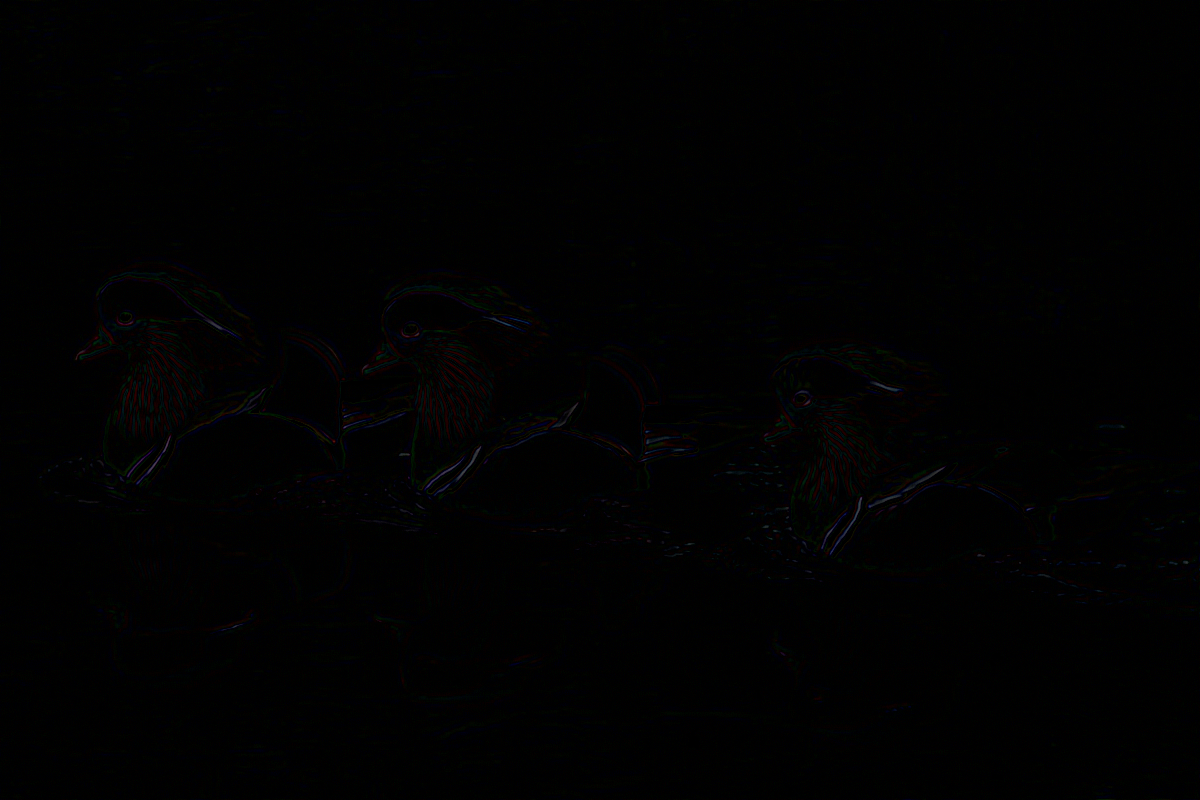

In [ ]:
# show different between hsi-based and rgb-based
cv2_imshow(sharp_hsi-sharp_rgb)